In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
circle_radius = 10
set_size = 1000

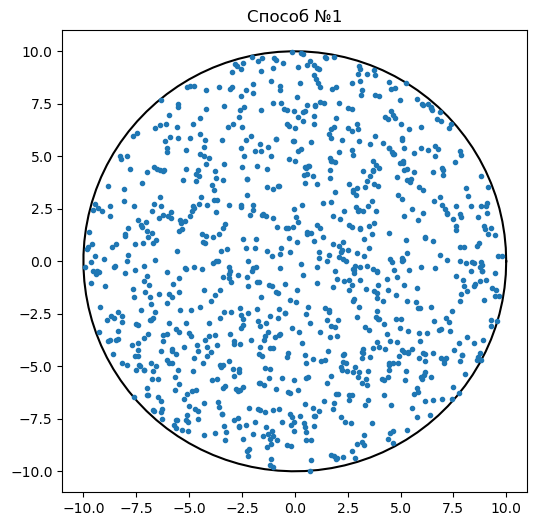

Mean for x's 0.03856660123099215
Mean for y's -0.19831879308946482
Var for x's 24.3623953403208
Var for y's 24.946672414255186


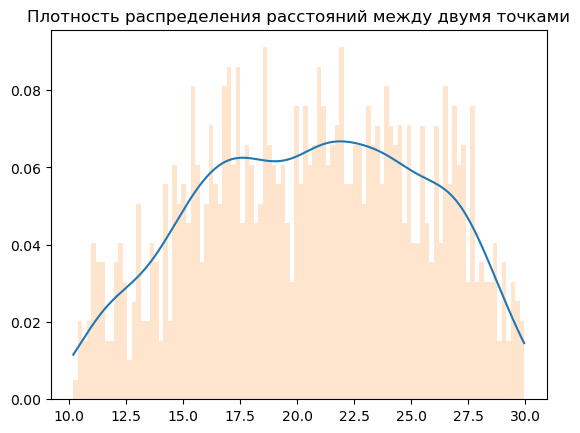

In [4]:
#Задание 1.1
set_x = [] # тут храним координаты х
set_y = [] # у
dots_counter = 0 # счетчик для ген чисел
while dots_counter < set_size:
    x=np.random.uniform(-10,10)
    y=np.random.uniform(-10,10)
    if x**2 + y**2 < circle_radius**2: # тут идет проверка если входит 
        set_x.append(x)
        set_y.append(y)
        dots_counter +=1
circle_angels=np.linspace(0, 2*np.pi,100) # тут рисуем линию окружности
cirle_x=circle_radius*np.cos(circle_angels) # построение окружности
circle_y=circle_radius*np.sin(circle_angels)
plt.figure(dpi=100, figsize=(6,6))
plt.title('Способ №1')
plt.plot(cirle_x,circle_y,'black')
plt.plot(set_x,set_y,'.')
plt.show()
# Задание 1.2
print('Mean for x\'s',np.mean(set_x)) # среднее
print('Mean for y\'s',np.mean(set_y))
print('Var for x\'s',np.var(set_x)) # дисперсия
print('Var for y\'s',np.var(set_y))
# Задание 1.3
main_x = 20
main_y = 0
def distance (x1,y1,x2,y2): # Формула для подсчета между двумя точками
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)
distances = []
for i in range(set_size): # тут считается расстояние от x1 до х2
    distances.append(distance(set_x[i],set_y[i],main_x,main_y))
distances.sort()
kde_distances_y = gaussian_kde(distances).evaluate(distances) # позволяет сгладить наши у 
plt.figure(dpi=100)
plt.title('Плотность распределения расстояний между двумя точками')
plt.plot(distances, kde_distances_y)
plt.hist(distances,bins=100,alpha=0.2,density=True)
plt.show()

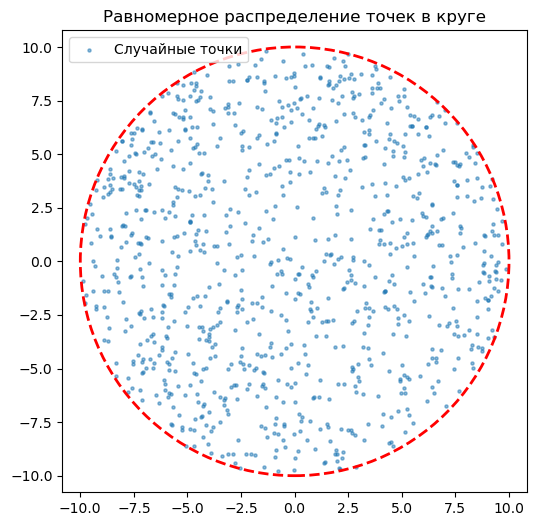

Mean for x's -0.30735606535522514
Mean for y's 0.3356566593211417
Var for x's 26.925738871170275
Var for y's 25.67116442765841


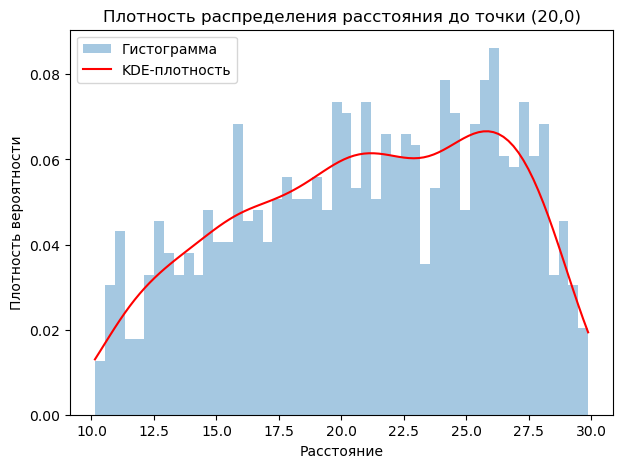

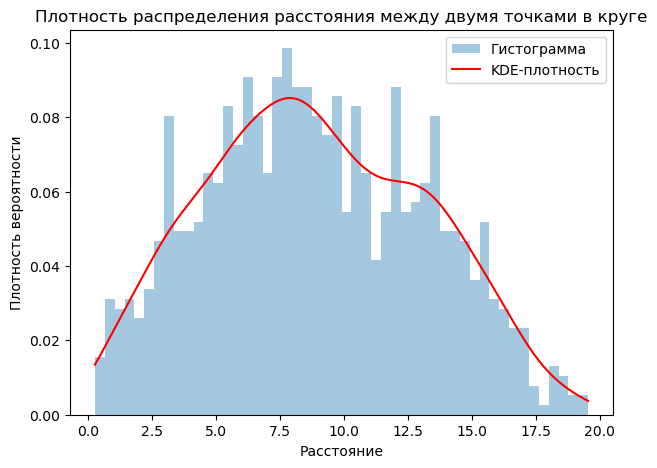

In [19]:
#Задание 2.1
# случайный угол и радиус
theta = np.random.uniform(0, 2*np.pi, set_size) # случайные углы от 0 до 2п равномерное направление
r = circle_radius * np.sqrt(np.random.uniform(0, 1, set_size)) # случайные расстояния от центра sqrt равномерно по площади круга

# перевод в x, y
x = r * np.cos(theta) # горизонтальное смещение 
y = r * np.sin(theta) # вертикальное смещение

# Визуализация точек
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(x, y, s=5, alpha=0.5, label="Случайные точки")
circle = plt.Circle((0, 0), circle_radius, color='r', fill=False, lw=2, linestyle="--") # начало координат, радиус, цвет, фон, плотность пикселей, линия
plt.gca().add_artist(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Равномерное распределение точек в круге")
plt.legend()
plt.show()
# Задание 2.2 
print('Mean for x\'s',np.mean(x))
print('Mean for y\'s',np.mean(y))
print('Var for x\'s',np.var(x))
print('Var for y\'s',np.var(y))

# Задание 2.3
# фиксированная точка вне круга
x0, y0 = 20, 0

# расстояния от точек до (20,0)
distances = np.sqrt((x - x0)**2 + (y - y0)**2)

# оценка плотности (KDE)
kde = gaussian_kde(distances) # оценку плотности распределения
x_vals = np.linspace(min(distances), max(distances), 100) # Создаётся массив из 100 точек, равномерно распределённых
pdf_vals = kde(x_vals)

# график
plt.figure(figsize=(7,5), dpi=100)
plt.hist(distances, bins=50, density=True, alpha=0.4, label="Гистограмма")
plt.plot(x_vals, pdf_vals, "r-", label="KDE-плотность")
plt.title("Плотность распределения расстояния до точки (20,0)")
plt.xlabel("Расстояние")
plt.ylabel("Плотность вероятности")
plt.legend()
plt.show()